In [7]:
pip install alpaca

In [8]:
pip install load_dotenv

In [10]:
# Install the alpaca_trade_api module
!pip install alpaca-trade-api

# Import the module after installation
import alpaca_trade_api as tradeapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 9.9 MB/s eta 0:00:00
Reason for being yanked: This version includes overly restrictive multidict upper boundary disallowing multidict v6+. The previous patch version didn't have that and this is now causing dependency resolution problems for the users who have an "incompatible" version pinned. This is not really necessary anymore and will be addressed in the next release v3.8.3

https://github.com/aio-libs/aiohttp/pull/6950
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.7
    Uninstalling msgpack-1.0.7:
      Successfully uninstalled msgpack-1.0.7
  Attempting uninstall: urllib3

In [12]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.0 MB/s eta 0:00:00


In [14]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=4ccc3911345de8a478ffb35852e885b38972abfab61b832d69e35c3edeed830a
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [15]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline
import ta
from textblob import TextBlob
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [16]:
# Load .env enviroment variables
load_dotenv()

False

In [18]:
ALPACA_API_KEY="PK7KB4YV1VVIZXY3KR7K"
ALPACA_SECRET_KEY="zdgytHlXTB3eR8hRW6pJk3LIZ1ER6EnzJDyLlqzg"

In [20]:
# Set Alpaca API key and secret
#alpaca_api_key=os.getenv('ALPACA_API_KEY')
#alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version='v2'
)

In [22]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-01-01', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-12-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["GOOGL"]
# Set timeframe to "1Minute" for Alpaca API
timeframe = "1Day"


In [23]:
### Creating Alpaca Dataframe
df_tickers=alpaca.get_bars(
        tickers,
        timeframe,
        start=start_time,
        end=end_time
    ).df
df_tickers

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-01-03 05:00:00+00:00,89.12,91.050,88.5200,282706,89.585,33269171,89.299959,GOOGL
2023-01-04 05:00:00+00:00,88.08,90.650,87.2710,367153,90.350,39823023,88.255544,GOOGL
2023-01-05 05:00:00+00:00,86.20,87.570,85.9000,279560,87.470,31635307,86.519247,GOOGL
2023-01-06 05:00:00+00:00,87.34,87.690,84.8600,400098,86.790,46119929,86.545675,GOOGL
2023-01-09 05:00:00+00:00,88.02,90.050,87.8600,296274,88.360,32452249,88.858889,GOOGL
...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,138.420,136.0000,248855,136.030,23439152,136.740726,GOOGL
2023-11-28 05:00:00+00:00,137.20,137.250,135.4222,206263,136.080,18733923,136.612461,GOOGL
2023-11-29 05:00:00+00:00,134.99,138.288,134.8400,284255,137.570,23970928,135.811616,GOOGL


In [24]:
# Fund and Shares & investement
fund=125.07
shares=float(fund)/df_tickers['close'].iloc[0]
df_tickers["invest"]=df_tickers["close"] * shares
print(f"Your Apple Shares are {round(shares,0)}")

Your Apple Shares are 1.0


In [25]:
### Defining function to calculate MACD and Signal Line
def calculate_macd(df_tickers = df_tickers, short_window=12, long_window=26):
        df_tickers['ShortEMA'] = df_tickers['close'].ewm(span=short_window, adjust=False).mean()
        df_tickers['LongEMA'] = df_tickers['close'].ewm(span=long_window, adjust=False).mean()
        df_tickers['MACD'] = df_tickers['ShortEMA'] - df_tickers['LongEMA']
        df_tickers['SignalLine'] = df_tickers['MACD'].ewm(span=9, adjust=False).mean()
        df_tickers['histogram'] = df_tickers['MACD'] - df_tickers['SignalLine']
        return df_tickers

In [26]:
### Calculating the MACD Line
calculate_macd(df_tickers)

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,LongEMA,MACD,SignalLine,histogram
timestamp,,,,,,,,,,,,,,
2023-01-03 05:00:00+00:00,89.12,91.050,88.5200,282706,89.585,33269171,89.299959,GOOGL,125.070000,89.120000,89.120000,0.000000,0.000000,0.000000
2023-01-04 05:00:00+00:00,88.08,90.650,87.2710,367153,90.350,39823023,88.255544,GOOGL,123.610476,88.960000,89.042963,-0.082963,-0.016593,-0.066370
2023-01-05 05:00:00+00:00,86.20,87.570,85.9000,279560,87.470,31635307,86.519247,GOOGL,120.972105,88.535385,88.832373,-0.296988,-0.072672,-0.224317
2023-01-06 05:00:00+00:00,87.34,87.690,84.8600,400098,86.790,46119929,86.545675,GOOGL,122.571968,88.351479,88.721827,-0.370348,-0.132207,-0.238141
2023-01-09 05:00:00+00:00,88.02,90.050,87.8600,296274,88.360,32452249,88.858889,GOOGL,123.526272,88.300482,88.669840,-0.369357,-0.179637,-0.189720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,138.420,136.0000,248855,136.030,23439152,136.740726,GOOGL,191.436251,135.171085,133.830306,1.340779,0.639708,0.701072
2023-11-28 05:00:00+00:00,137.20,137.250,135.4222,206263,136.080,18733923,136.612461,GOOGL,192.544928,135.483226,134.079913,1.403313,0.792429,0.610884
2023-11-29 05:00:00+00:00,134.99,138.288,134.8400,284255,137.570,23970928,135.811616,GOOGL,189.443439,135.407345,134.147327,1.260018,0.885947,0.374072


In [27]:
# Calculate the MACD and signal line using talib
#macd= ta.trend.MACD(data['Close']).macd()
#signal= ta.trend.MACD(data['Close']).macd_signal()

# Calculate the RSI using talib
rsi = ta.momentum.RSIIndicator(df_tickers['close']).rsi()

# Calculate the ADX using talib
adx = ta.trend.adx(df_tickers['high'], df_tickers['low'], df_tickers['close'])

# Perform sentiment analysis using TextBlob
#sentiment = []
#for date in df_tickers.index:
#    sentiment.append(TextBlob(str(df_tickers.loc[date, 'close'])).sentiment.polarity)

#Moving averages short and long
df_tickers['ma 50']= df_tickers['close'].rolling(window=50).mean()
df_tickers['ma 200']=df_tickers['close'].rolling(window=200).mean()

# Volume related indicator
df_tickers['volume sma']=df_tickers['volume'].rolling(window=20).mean()

# Support and resistance levels
df_tickers['support level']=df_tickers['low'].rolling(window=50).min()
df_tickers['resistance level']=df_tickers['high'].rolling(window=50).max()

# add other ta indicators using ta library
#df_tickers=add_all_ta_features(df_tickers,'open','high','low','close','volume')

# Create a DataFrame to store the signals
#signals = pd.DataFrame(index=df_tickers.index)
#signals['MACD'] = macd
#signals['Signal'] = signal

df_tickers['rsi'] = rsi
df_tickers['adx'] = adx
#df_tickers['sentiment'] = sentiment

# Set the short window and long window
short_window_sma = 4
long_window_sma = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
df_tickers['SMA_Fast'] = df_tickers['close'].rolling(window=short_window_sma).mean()
df_tickers['SMA_Slow'] = df_tickers['close'].rolling(window=long_window_sma).mean()

# Aweseome Oscillator
#awesome_oscillator = ta.momentum.AwesomeOscillator(high=df_tickers['high'], low=df_tickers['low'], window1=5, window2=34)
#df_tickers['Awesome_Oscillator'] = awesome_oscillator.awesome_oscillator()
df_tickers['Median_Price'] = (df_tickers['high'] + df_tickers['low']) / 2
df_tickers['SMA5'] = df_tickers['Median_Price'].rolling(window=5).mean()
df_tickers['SMA34'] = df_tickers['Median_Price'].rolling(window=34).mean()
df_tickers['Awesome_Oscillator'] = df_tickers['SMA5'] - df_tickers['SMA34']



# Chaikin Money Flow Indicator
#df_tickers['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(high=df_tickers['high'], low=df_tickers['low'], Close=df_tickers['close'], volume=df_tickers['volume'], window=20)
cmf_indicator = ta.volume.ChaikinMoneyFlowIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], volume=df_tickers['volume'], window=20)
df_tickers['Chaikin_Money_Flow'] = cmf_indicator.chaikin_money_flow()

#ATR (Average True Range)
atr = ta.volatility.AverageTrueRange(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=14)
df_tickers['ATR'] = atr.average_true_range()

# Bollinger Bands
bollinger_bands= ta.volatility.BollingerBands(close=df_tickers['close'], window=20, window_dev=2)
df_tickers['BB_Middle'] = bollinger_bands.bollinger_mavg()  # Middle band (SMA)
df_tickers['BB_Upper'] = bollinger_bands.bollinger_hband()  # Upper band
df_tickers['BB_Lower'] = bollinger_bands.bollinger_lband()  # Lower band

# Stochastic Oscillator
stochastic_oscillator = ta.momentum.StochasticOscillator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=14, smooth_window=3)
df_tickers['%K'] = stochastic_oscillator.stoch()
df_tickers['%D'] = stochastic_oscillator.stoch_signal()

# CCI (Commodity Channel Index)
cci_indicator = ta.trend.CCIIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=20)
df_tickers['CCI'] = cci_indicator.cci()

# Parabolic SAR (Stop and Reverse)
psar_indicator = ta.trend.PSARIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'])
df_tickers['PSAR'] = psar_indicator.psar()

#Ichimoku Cloud
conversion_line_period = 9
base_line_period = 26
lagging_span_period = 52
conversion_line = (df_tickers['high'].rolling(window=conversion_line_period).max() + df_tickers['low'].rolling(window=conversion_line_period).min()) / 2
base_line = (df_tickers['high'].rolling(window=base_line_period).max() + df_tickers['low'].rolling(window=base_line_period).min()) / 2
leading_span_a = (conversion_line + base_line) / 2
leading_span_b = (df_tickers['high'].rolling(window=lagging_span_period).max() + df_tickers['low'].rolling(window=lagging_span_period).min()) / 2
lagging_span = df_tickers['close'].shift(-lagging_span_period)

df_tickers['Ichimoku_Conversion_Line'] = conversion_line
df_tickers['Ichimoku_Base_Line'] = base_line
df_tickers['Ichimoku_Leading_Span_A'] = leading_span_a
df_tickers['Ichimoku_Leading_Span_B'] = leading_span_b
df_tickers['Ichimoku_Lagging_Span'] = lagging_span

# Williams %R
#williams_r_indicator = ta.momentum.WilliamsR(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], lbp=14)
#df_tickers['Williams_%R'] = williams_r_indicator.williams_r()

williams_r_indicator = ta.momentum.WilliamsRIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], lbp=14)
df_tickers['Williams_%R'] = williams_r_indicator.williams_r()

# Volume Weighted Average Price (VWAP)
obv_indicator = ta.volume.OnBalanceVolumeIndicator(close=df_tickers['close'], volume=df_tickers['volume'])
df_tickers['On_Balance_Volume'] = obv_indicator.on_balance_volume()


# On-Balance Volume (OBV)
df_tickers['OBV'] = (df_tickers['close'].pct_change().fillna(0) > 0).astype(int)
df_tickers['OBV'] = (df_tickers['OBV'] * 2 - 1) * df_tickers['volume']
df_tickers['OBV'] = df_tickers['OBV'].cumsum()

# Relative Vigor Index (RVI)
df_tickers['Typical_Price'] = (df_tickers['high'] + df_tickers['low'] + 2 * df_tickers['close']) / 4
df_tickers['Closing_Price_Change'] = df_tickers['close'].diff()
df_tickers['RVI'] = df_tickers['Typical_Price'].rolling(window=14).sum() / df_tickers['Closing_Price_Change'].abs().rolling(window=14).sum()

#Aroon Indicator
aroon_indicator = ta.trend.AroonIndicator(high=df_tickers['high'], low=df_tickers['low'], window=14)
df_tickers['Aroon_Up'] = aroon_indicator.aroon_up()
df_tickers['Aroon_Down'] = aroon_indicator.aroon_down()
df_tickers['Aroon_Oscillator'] = aroon_indicator.aroon_indicator()

#Chaikin Oscillator
df_tickers['ADL'] = ((df_tickers['close'] - df_tickers['low']) - (df_tickers['high'] - df_tickers['close'])) / (df_tickers['high'] - df_tickers['low']) * df_tickers['volume']
df_tickers['ADL'] = df_tickers['ADL'].cumsum()
df_tickers['EMA3'] = df_tickers['ADL'].ewm(span=3, adjust=False).mean()
df_tickers['EMA10'] = df_tickers['ADL'].ewm(span=10, adjust=False).mean()
df_tickers['Chaikin_Oscillator'] = df_tickers['EMA3'] - df_tickers['EMA10']



In [28]:
df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,Typical_Price,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-03 05:00:00+00:00,89.12,91.05,88.520,282706,89.585,33269171,89.299959,GOOGL,125.070000,89.120000,...,89.45250,NaN,NaN,NaN,NaN,NaN,-1.748933e+07,-1.748933e+07,-1.748933e+07,0.000000e+00
2023-01-04 05:00:00+00:00,88.08,90.65,87.271,367153,90.350,39823023,88.255544,GOOGL,123.610476,88.960000,...,88.52025,-1.04,NaN,NaN,NaN,NaN,-3.824350e+07,-2.786641e+07,-2.126281e+07,-6.603600e+06
2023-01-05 05:00:00+00:00,86.20,87.57,85.900,279560,87.470,31635307,86.519247,GOOGL,120.972105,88.535385,...,86.46750,-1.88,NaN,NaN,NaN,NaN,-5.851283e+07,-4.318962e+07,-2.803554e+07,-1.515408e+07
2023-01-06 05:00:00+00:00,87.34,87.69,84.860,400098,86.790,46119929,86.545675,GOOGL,122.571968,88.351479,...,86.80750,1.14,NaN,NaN,NaN,NaN,-2.380065e+07,-3.349514e+07,-2.726556e+07,-6.229574e+06
2023-01-09 05:00:00+00:00,88.02,90.05,87.860,296274,88.360,32452249,88.858889,GOOGL,123.526272,88.300482,...,88.48750,0.68,NaN,NaN,NaN,NaN,-5.151102e+07,-4.250308e+07,-3.167383e+07,-1.082925e+07


In [29]:
column_names = df_tickers.columns.tolist()
print(column_names)

['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'symbol', 'invest', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'Chaikin_Money_Flow', 'ATR', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator']


In [30]:
# df_tickers['algo_strategy_signal'] = pd.NA
# position = None
# buy_price = 0
# invest_buy_price = 0
# total_buy_amount = 0
# total_invest_buy_amount = 0
# total_sell_amount = 0
# total_invest_sell_amount = 0
# signals = []
# for i in range(1, len(df_tickers)):
#     if df_tickers['MACD'][i] > df_tickers['SignalLine'][i] and df_tickers['MACD'][i - 1] <= df_tickers['SignalLine'][i - 1]:
#         for a in df_tickers['adx']:
#             if a > 20:
#                 position = 'buy'
#                 buy_price = df_tickers['close'][i]
#                 invest_buy_price = df_tickers['invest'][i]
#                 total_buy_amount += buy_price
#                 total_invest_buy_amount += invest_buy_price
#                 signals.append((df_tickers.index[i], 'Buy', buy_price))
#                 df_tickers.at[i, 'algo_strategy_signal'] = -1
#     elif df_tickers['MACD'][i] < df_tickers['SignalLine'][i] and df_tickers['MACD'][i - 1] >= df_tickers['SignalLine'][i - 1]:
#         for a in df_tickers['adx']:
#             if a > 20:
#                 position = 'sell'
#                 sell_price = df_tickers['close'][i]
#                 invest_sell_price = df_tickers['invest'][i]
#                 total_sell_amount += sell_price
#                 total_invest_sell_amount += invest_sell_price
#                 signals.append((df_tickers.index[i], 'Sell', sell_price))
#                 df_tickers.at[i, 'algo_strategy_signal'] = 1
# profit = total_sell_amount - total_buy_amount
# invest_profit = total_invest_sell_amount - total_invest_buy_amount
# df_tickers['trade price'] = df_tickers['close'] * df_tickers['algo_strategy_signal']
# df_tickers['invest trade price'] = df_tickers['invest'] * df_tickers['algo_strategy_signal']
# df_tickers['balance'] = df_tickers['trade price'].cumsum()
# df_tickers['invest balance'] = df_tickers['invest trade price'].cumsum()






# #Here are the changes made:
# #Used at method to set values in the DataFrame for better performance.
# #Removed unnecessary loops over 'adx' values.
# #Corrected the calculation of the 'balance' and 'invest balance' columns to use cumulative sum (cumsum).

In [175]:
### Using a loop to Calculate buy and sell signals based on MACD Line indicator and defining the total cashflow for that period. This shows if we made a profit or not
data_frame = df_tickers.copy()
position = None
buy_price = 0
invest_buy_price=0
total_buy_amount = 0
total_invest_buy_amount=0
total_sell_amount = 0
total_invest_sell_amount=0
sell_price = 0
invest_sell_price=0
signals = []
data_frame['algo signal']=pd.NA
for i in range(1, len(data_frame)):
        if (data_frame['MACD'][i] > data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] <= data_frame['SignalLine'][i - 1]):
                for a in data_frame['adx']:
                 if a > 20:
                  position = 'buy'
                  buy_price = data_frame['close'][i]
                  invest_buy_price=data_frame['invest'][i]
                  total_buy_amount += buy_price
                  total_invest_buy_amount += invest_buy_price
                  signals.append((data_frame.index[i], 'Buy', buy_price))
                  data_frame['algo signal'][i]=-1
        elif (data_frame['MACD'][i] < data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] >= data_frame['SignalLine'][i - 1]):
                for a in data_frame['adx']:
                 if a > 20:
                  position = 'sell'
                  sell_price = data_frame['close'][i]
                  invest_sell_price=data_frame['invest'][i]
                  total_sell_amount += sell_price
                  total_invest_sell_amount +=invest_sell_price
                  signals.append((data_frame.index[i], 'Sell', sell_price))
                  data_frame['algo signal'][i]=1

profit = total_sell_amount - total_buy_amount
invest_profit=total_invest_sell_amount - total_invest_buy_amount

<ipython-input-175-6b2eab6ef8e4>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=1
<ipython-input-175-6b2eab6ef8e4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=-1


In [176]:
data_frame['trade price']=data_frame['close'].where(data_frame['algo signal'].isin([-1,1]))
data_frame['invest trade price']=data_frame['invest'].where(data_frame['algo signal'].isin([-1,1]))
data_frame['balance']=data_frame['trade price']*data_frame['algo signal']
data_frame['invest balance']=data_frame['invest trade price']*data_frame['algo signal']
data_frame['cumsum balance'] = df_tickers['trade price'].cumsum()
data_frame['cumsum invest balance'] = df_tickers['invest trade price'].cumsum()


In [177]:
data_frame2=data_frame.dropna(subset=['balance'], how='all')

In [178]:
data_frame2.tail(50)

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,cumsum invest balance,buy,sell,Returns,Daily Returns Signal,Daily Strategy Returns,commission,better balance,better invest balance,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-04 05:00:00+00:00,88.08,90.650,87.271,367153,90.35,39823023,88.255544,GOOGL,123.610476,88.960000,...,123.610476,88.08,NaN,-0.011670,-1.0,-0.000000,-0.0,-88.08,-123.610476,1
2023-01-11 05:00:00+00:00,91.52,91.600,89.010,258613,89.18,30560593,90.730471,GOOGL,128.438133,88.811351,...,252.048609,NaN,-91.52,0.035060,1.0,0.035060,NaN,NaN,NaN,-1
2023-02-09 05:00:00+00:00,95.01,100.030,93.630,1198483,100.00,123637886,95.302575,GOOGL,133.335959,99.936642,...,385.384568,95.01,NaN,-0.043876,-1.0,0.043876,-0.0,-95.01,-133.335959,1
2023-03-07 05:00:00+00:00,93.86,95.670,93.530,304384,94.98,30430742,94.267760,GOOGL,131.722062,93.076743,...,517.106630,NaN,-93.86,-0.013350,-1.0,-0.013350,-0.0,-93.86,-131.722062,-1
2023-03-10 05:00:00+00:00,90.63,92.790,90.395,381136,92.17,40219287,91.267541,GOOGL,127.189117,92.731044,...,644.295747,90.63,NaN,-0.018306,-1.0,0.018306,-0.0,-90.63,-127.189117,1
2023-03-14 04:00:00+00:00,93.97,94.360,92.440,346289,92.56,41590252,93.623847,GOOGL,131.876435,92.710629,...,776.172182,NaN,-93.97,0.031391,1.0,0.031391,NaN,NaN,NaN,-1
2023-04-18 04:00:00+00:00,104.50,106.540,104.070,287813,106.49,29156034,105.011384,GOOGL,146.654118,105.312290,...,922.826300,104.5,NaN,-0.013872,-1.0,0.013872,-0.0,-104.50,-146.654118,1
2023-05-10 04:00:00+00:00,111.75,112.940,107.930,644821,107.97,67723030,110.717785,GOOGL,156.828686,106.989274,...,1079.654987,NaN,-111.75,0.040987,1.0,-0.040987,NaN,NaN,NaN,-1
2023-06-02 04:00:00+00:00,124.67,126.150,123.760,369390,123.99,35480359,124.800368,GOOGL,174.960468,121.981092,...,1254.615454,124.67,NaN,0.007679,1.0,0.007679,NaN,NaN,NaN,1


In [179]:
profit_test=data_frame2['balance'].sum()
print(profit_test)

103.89


In [180]:
# #printing total buy and total sell
# print("Total Buy Amount:", total_buy_amount)
# print("Total Sell Amount:", total_sell_amount)
# print ("Profit:", (profit))
# print('-----------------------')
# print("Total Buy Amount:", total_invest_buy_amount)
# print("Total Sell Amount:", total_invest_sell_amount)
# print ("Invest Profit:", (invest_profit))

In [214]:
data_frame['buy']=data_frame['balance'].where(data_frame['balance']>0)
data_frame['sell']=data_frame['balance'].where(data_frame['balance']<0)
buy=data_frame['buy'].sum()
sell=data_frame['sell'].sum()
balance_profit=data_frame['balance'].sum()
print(f"total buy amount is ${buy}")
print(f"total sell amount is ${sell}")
print(f"Profit/Loss is ${balance_profit}")

total buy amount is $1153.67
total sell amount is $-1049.78
Profit/Loss is $103.89


In [183]:
#Plot New Startegy close, macd buy, macd sell
# Visualize exit position relative to close price
exit = data_frame[data_frame['algo signal'] == 1.0]['close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = data_frame[data_frame['algo signal'] == -1.0]['close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = data_frame[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
e_moving_avgs = data_frame[['MACD', 'SignalLine']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=200
)

# Create the overlay plot
entry_exit_plot = security_close * entry * exit

# Show the plot with a title
display(e_moving_avgs)
display(entry_exit_plot.opts(
    title="Apple - MACD, Signal, Entry and Exit Points"
))


:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

:Overlay
   .Curve.I          :Curve   [timestamp]   (close)
   .Scatter.Close.I  :Scatter   [timestamp]   (close)
   .Scatter.Close.II :Scatter   [timestamp]   (close)

In [184]:
Close_plot = df_tickers['close'].hvplot.line(
    x='timestamp',
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close',
    xlabel='timestamp',
    title='Closing Price AAPL',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

MACD_plot = df_tickers['MACD'].hvplot.line(
    x='timestamp',
    y='MACD',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close',
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.2f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Signal_plot = df_tickers['SignalLine'].hvplot.line(
    x='timestamp',
    y='SignalLine',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close',
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.2f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

Histogram_plot = df_tickers['histogram'].hvplot.bar(
    x='timestamp',
    y='histogram',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='MACD-Signal',
    xlabel='timestamp',
    title='MACD Line - Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.2f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)



In [185]:
Close_plot

:Curve   [timestamp]   (close)

In [186]:
plot = MACD_plot * Signal_plot
plot

:Overlay
   .Curve.MACD       :Curve   [timestamp]   (MACD)
   .Curve.SignalLine :Curve   [timestamp]   (SignalLine)

In [187]:
Histogram_plot

:Bars   [timestamp]   (histogram)

In [188]:
# Use the pct_change function to generate returns from close prices
data_frame["Returns"] = data_frame["close"].pct_change()

In [189]:
# Initialize the new Signal column
data_frame['Daily Returns Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
data_frame.loc[(data_frame['Returns'] >= 0), 'Daily Returns Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
data_frame.loc[(data_frame['Returns'] < 0), 'Daily Returns Signal'] = -1

In [190]:
data_frame['Daily Returns Signal'].value_counts()

 1.0    125
-1.0    105
 0.0      1
Name: Daily Returns Signal, dtype: int64

In [191]:
# Calculate the strategy returns and add them to the signals_df DataFrame
data_frame['Daily Strategy Returns'] = data_frame['Returns'] * data_frame['Daily Returns Signal'].shift()

<Axes: xlabel='timestamp'>

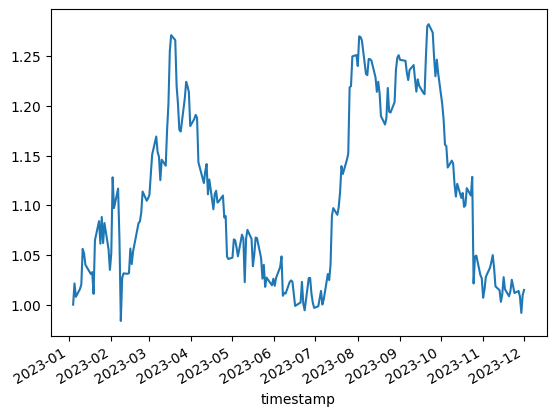

In [192]:
# Plot Strategy Returns to examine performance
(1 + data_frame['Daily Strategy Returns']).cumprod().plot()

In [193]:
data_frame.head()

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,cumsum invest balance,buy,sell,Returns,Daily Returns Signal,Daily Strategy Returns,commission,better balance,better invest balance,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-03 05:00:00+00:00,89.12,91.05,88.520,282706,89.585,33269171,89.299959,GOOGL,125.070000,89.120000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,<NA>
2023-01-04 05:00:00+00:00,88.08,90.65,87.271,367153,90.350,39823023,88.255544,GOOGL,123.610476,88.960000,...,123.610476,88.08,NaN,-0.011670,-1.0,-0.000000,-0.0,-88.08,-123.610476,1
2023-01-05 05:00:00+00:00,86.20,87.57,85.900,279560,87.470,31635307,86.519247,GOOGL,120.972105,88.535385,...,NaN,NaN,NaN,-0.021344,-1.0,0.021344,-0.0,-86.20,-120.972105,<NA>
2023-01-06 05:00:00+00:00,87.34,87.69,84.860,400098,86.790,46119929,86.545675,GOOGL,122.571968,88.351479,...,NaN,NaN,NaN,0.013225,1.0,-0.013225,NaN,NaN,NaN,<NA>
2023-01-09 05:00:00+00:00,88.02,90.05,87.860,296274,88.360,32452249,88.858889,GOOGL,123.526272,88.300482,...,NaN,NaN,NaN,0.007786,1.0,0.007786,NaN,NaN,NaN,<NA>


In [194]:
# Drop the rows where there is no balace in the balnce column
#data_frame2=data_frame.dropna(subset=['balance'], how='all')


In [195]:
# Sum balance of two consecutive trades of buy and sell
#data_frame2['profit/loss']=data_frame2['balance'].shift(1)+data_frame2['balance']
#data_frame2['profit/loss'].fillna(data_frame2['balance'], inplace=True)

In [196]:
# profit signa is assignes where profit is more than loss to 1
#data_frame2['profit signal']=np.where(data_frame2['profit/loss']>0, -1,1)


In [197]:
#data_frame2['buy/sell signal']=data_frame2['profit signal'].shift(1).fillna(0)*-1
#data_frame2.tail(50)

#data_frame2['buy/sell signal']=np.where(data_frame2['profit signal']==1, -1,1)


In [198]:
# Initialize the new Signal column
#data_frame2['Final Signal'] = 0.0
commision=0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
#data_frame2.loc[(data_frame2['profit/loss'] >= 0), 'Final Signal'] = -1

# When Actual Returns are less than 0, generate signal to sell stock short
#data_frame2.loc[(data_frame2['profit/loss'] < 0), 'Final Signal'] = 1

#Calculate new profits based on updated signals
data_frame['commission']=commision*data_frame['Daily Returns Signal'].where(data_frame['Daily Returns Signal']==-1)
data_frame['better balance']=data_frame['close']*data_frame['Daily Returns Signal']+data_frame['commission']
data_frame['better invest balance']=data_frame['invest']*data_frame['Daily Returns Signal']+data_frame['commission']
profit_daily_strategy_returns=data_frame['Daily Strategy Returns'].sum()-(data_frame['commission'].sum())

print(f"Daily Strategt Returns total profit is ${profit_daily_strategy_returns}")

Daily Strategt Returns total profit is $0.058314188443809645


In [199]:

profit2=data_frame['better balance'].sum()
print(f"1 share profit is ${profit2}")
print("---------------")
invest_profit2=data_frame['better invest balance'].sum()
print(f"multiple shares profit is ${invest_profit2}")

1 share profit is $-12229.004999999997
---------------
multiple shares profit is $-17162.047299708254


In [200]:
#useful_df=data_frame[['profit/loss','profit signal','Final Signal','better balance','better invest balance']].copy()
#useful_df.tail()

In [201]:
#final_data_frame=pd.concat([data_frame, useful_df], axis=1)
#final_data_frame.head()

In [202]:
data_frame.tail(50)

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,cumsum invest balance,buy,sell,Returns,Daily Returns Signal,Daily Strategy Returns,commission,better balance,better invest balance,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-22 04:00:00+00:00,130.250,132.0250,129.6000,258665,130.760,26397339,130.751800,GOOGL,182.791377,134.392809,...,NaN,NaN,NaN,-0.001457,-1.0,0.001457,-0.0,-130.250,-182.791377,<NA>
2023-09-25 04:00:00+00:00,131.110,131.1700,128.9600,248301,129.830,20096978,130.468000,GOOGL,183.998291,133.887762,...,NaN,NaN,NaN,0.006603,1.0,-0.006603,NaN,NaN,NaN,<NA>
2023-09-26 04:00:00+00:00,128.565,130.3645,127.2200,311552,129.770,25721806,128.323549,GOOGL,180.426667,133.068875,...,NaN,NaN,NaN,-0.019411,-1.0,-0.019411,-0.0,-128.565,-180.426667,<NA>
2023-09-27 04:00:00+00:00,130.540,130.8950,128.5700,266738,128.570,22752667,129.842027,GOOGL,183.198360,132.679818,...,NaN,NaN,NaN,0.015362,1.0,-0.015362,NaN,NaN,NaN,<NA>
2023-09-28 04:00:00+00:00,132.310,133.3000,129.7900,267240,129.840,22516661,131.921307,GOOGL,185.682357,132.622923,...,NaN,NaN,NaN,0.013559,1.0,0.013559,NaN,NaN,NaN,<NA>
2023-09-29 04:00:00+00:00,130.860,134.0500,130.3600,302954,133.280,30866615,131.669667,GOOGL,183.647444,132.351704,...,NaN,NaN,NaN,-0.010959,-1.0,-0.010959,-0.0,-130.860,-183.647444,<NA>
2023-10-02 04:00:00+00:00,134.170,134.4200,131.1700,281721,131.210,22292212,133.353030,GOOGL,188.292660,132.631442,...,NaN,NaN,NaN,0.025294,1.0,-0.025294,NaN,NaN,NaN,<NA>
2023-10-03 04:00:00+00:00,132.430,134.2600,131.8400,263663,133.940,22995041,132.684876,GOOGL,185.850764,132.600451,...,NaN,NaN,NaN,-0.012969,-1.0,-0.012969,-0.0,-132.430,-185.850764,<NA>
2023-10-04 04:00:00+00:00,135.240,135.5700,132.5300,302675,132.790,26759590,134.600189,GOOGL,189.794286,133.006535,...,NaN,NaN,NaN,0.021219,1.0,-0.021219,NaN,NaN,NaN,<NA>


In [203]:
#Plot New Startegy close, macd buy, macd sell
# Visualize exit position relative to close price
exit = data_frame[data_frame['Daily Returns Signal'] == -1.0]['close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = data_frame[data_frame['Daily Returns Signal'] == 1.0]['close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = data_frame[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
#e_moving_avgs = data_frame[['MACD', 'SignalLine']].hvplot(
#    ylabel='Price in $',
#    width=1000,
#    height=200
#)

# Create the overlay plot
entry_exit_plot = security_close * entry * exit

# Show the plot with a title
#display(e_moving_avgs)
display(entry_exit_plot.opts(
    title="Apple - MACD, Signal, Entry and Exit Points"
))


:Overlay
   .Curve.I          :Curve   [timestamp]   (close)
   .Scatter.Close.I  :Scatter   [timestamp]   (close)
   .Scatter.Close.II :Scatter   [timestamp]   (close)

In [204]:
# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df


In [205]:

df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)



In [206]:
# Fund and Shares & investement
fund=126.36
shares=float(fund)/df_spy['close'].iloc[0]
df_spy["shares investement"]=df_tickers["close"] * shares
print(f"Your Apple Shares are {round(shares,0)}")

Your Apple Shares are 1.0


In [207]:
# Returns
df_spy['return']=df_spy['close'].pct_change()
df_spy['shares investement return']=df_spy['shares investement'].pct_change()


In [208]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
df_spy['shares investement cumprod']=(1+df_spy['shares investement return']).cumprod()


In [209]:
df_spy['invest']=df_spy['cumprod']*float(fund)
df_spy['shares final invest']=df_spy['shares investement cumprod']*float(fund)
display(df_spy)

,close,shares investement,return,shares investement return,cumprod,shares investement cumprod,invest,shares final invest
timestamp,,,,,,,,
2023-01-03 05:00:00+00:00,89.12,126.360000,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04 05:00:00+00:00,88.08,124.885422,-0.011670,-0.011670,0.988330,0.988330,124.885422,124.885422
2023-01-05 05:00:00+00:00,86.20,122.219838,-0.021344,-0.021344,0.967235,0.967235,122.219838,122.219838
2023-01-06 05:00:00+00:00,87.34,123.836203,0.013225,0.013225,0.980027,0.980027,123.836203,123.836203
2023-01-09 05:00:00+00:00,88.02,124.800350,0.007786,0.007786,0.987657,0.987657,124.800350,124.800350
...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,193.410768,-0.002048,-0.002048,1.530633,1.530633,193.410768,193.410768
2023-11-28 05:00:00+00:00,137.20,194.530880,0.005791,0.005791,1.539497,1.539497,194.530880,194.530880
2023-11-29 05:00:00+00:00,134.99,191.397401,-0.016108,-0.016108,1.514699,1.514699,191.397401,191.397401


In [210]:
spy_plot = df_spy['invest'].hvplot.line(
    x='timestamp',
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns',
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

:Curve   [timestamp]   (invest)

In [211]:
spy_return=df_spy.iloc[-1,-1] - df_spy.iloc[1,-1]
print(f"You made a profit of your SPY investement of $ {round(spy_return,2)}")

You made a profit of your SPY investement of $ 62.07


In [215]:
final_df=pd.DataFrame({"MACD / Long": [balance_profit], "SPY":[spy_return]})
final_df.head()

,MACD / Long,SPY
0,103.89,62.074066


<Axes: title={'center': 'MACD long vs SPY Investement'}>

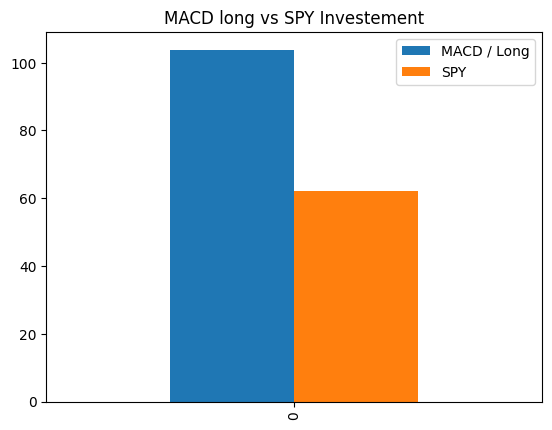

In [216]:
final_df.plot(kind ='bar', title='MACD long vs SPY Investement')

In [163]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [164]:
# Review the data types associated with the columns
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231 entries, 2023-01-03 05:00:00+00:00 to 2023-12-01 05:00:00+00:00
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   close                     231 non-null    float64
 1   high                      231 non-null    float64
 2   low                       231 non-null    float64
 3   trade_count               231 non-null    int64  
 4   open                      231 non-null    float64
 5   volume                    231 non-null    int64  
 6   vwap                      231 non-null    float64
 7   symbol                    231 non-null    object 
 8   invest                    231 non-null    float64
 9   ShortEMA                  231 non-null    float64
 10  LongEMA                   231 non-null    float64
 11  MACD                      231 non-null    float64
 12  SignalLine                231 non-null    float64
 13  histogram       

In [217]:
data_frame_neural=data_frame[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'Chaikin_Money_Flow', 'ATR', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator','algo signal']]

In [218]:
data_frame_neural.head()

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-03 05:00:00+00:00,89.12,91.05,88.520,282706,89.585,33269171,89.299959,89.120000,89.120000,0.000000,...,NaN,NaN,NaN,NaN,NaN,-1.748933e+07,-1.748933e+07,-1.748933e+07,0.000000e+00,<NA>
2023-01-04 05:00:00+00:00,88.08,90.65,87.271,367153,90.350,39823023,88.255544,88.960000,89.042963,-0.082963,...,-1.04,NaN,NaN,NaN,NaN,-3.824350e+07,-2.786641e+07,-2.126281e+07,-6.603600e+06,1
2023-01-05 05:00:00+00:00,86.20,87.57,85.900,279560,87.470,31635307,86.519247,88.535385,88.832373,-0.296988,...,-1.88,NaN,NaN,NaN,NaN,-5.851283e+07,-4.318962e+07,-2.803554e+07,-1.515408e+07,<NA>
2023-01-06 05:00:00+00:00,87.34,87.69,84.860,400098,86.790,46119929,86.545675,88.351479,88.721827,-0.370348,...,1.14,NaN,NaN,NaN,NaN,-2.380065e+07,-3.349514e+07,-2.726556e+07,-6.229574e+06,<NA>
2023-01-09 05:00:00+00:00,88.02,90.05,87.860,296274,88.360,32452249,88.858889,88.300482,88.669840,-0.369357,...,0.68,NaN,NaN,NaN,NaN,-5.151102e+07,-4.250308e+07,-3.167383e+07,-1.082925e+07,<NA>


In [219]:
data_frame_neural.fillna(0, inplace=True)

<ipython-input-219-1e85857a162c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_neural.fillna(0, inplace=True)


In [220]:
# Create a list of categorical variables
categorical_variables = data_frame_neural.select_dtypes(include=['object','category']).columns.tolist()

# Display the categorical variables list
print(categorical_variables)

[]


In [221]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [222]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(data_frame_neural[categorical_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [223]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

# Review the DataFrame
encoded_df

""
0
1
2
3
4
...
226
227
228
229


In [224]:
# Numerical variables
numerical_variables_df = data_frame_neural.drop(columns = categorical_variables)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([numerical_variables_df, encoded_df], axis=1)

# Review the DataFrame
encoded_df

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator,algo signal
2023-01-03 05:00:00+00:00,89.12,91.05,88.520,282706.0,89.585,33269171.0,89.299959,89.120000,89.120000,0.000000,...,0.00,0.0,0.0,0.0,0.0,-1.748933e+07,-1.748933e+07,-1.748933e+07,0.000000e+00,0.0
2023-01-04 05:00:00+00:00,88.08,90.65,87.271,367153.0,90.350,39823023.0,88.255544,88.960000,89.042963,-0.082963,...,-1.04,0.0,0.0,0.0,0.0,-3.824350e+07,-2.786641e+07,-2.126281e+07,-6.603600e+06,1.0
2023-01-05 05:00:00+00:00,86.20,87.57,85.900,279560.0,87.470,31635307.0,86.519247,88.535385,88.832373,-0.296988,...,-1.88,0.0,0.0,0.0,0.0,-5.851283e+07,-4.318962e+07,-2.803554e+07,-1.515408e+07,0.0
2023-01-06 05:00:00+00:00,87.34,87.69,84.860,400098.0,86.790,46119929.0,86.545675,88.351479,88.721827,-0.370348,...,1.14,0.0,0.0,0.0,0.0,-2.380065e+07,-3.349514e+07,-2.726556e+07,-6.229574e+06,0.0
2023-01-09 05:00:00+00:00,88.02,90.05,87.860,296274.0,88.360,32452249.0,88.858889,88.300482,88.669840,-0.369357,...,0.68,0.0,0.0,0.0,0.0,-5.151102e+07,-4.250308e+07,-3.167383e+07,-1.082925e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
X = encoded_df[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'Chaikin_Money_Flow', 'ATR', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator']].shift().dropna()
X

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Typical_Price,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator
2023-01-04 05:00:00+00:00,89.12,91.050,88.5200,282706.0,89.585,33269171.0,89.299959,89.120000,89.120000,0.000000,...,89.45250,0.00,0.000000,0.000000,0.000000,0.000000,-1.748933e+07,-1.748933e+07,-1.748933e+07,0.000000e+00
2023-01-05 05:00:00+00:00,88.08,90.650,87.2710,367153.0,90.350,39823023.0,88.255544,88.960000,89.042963,-0.082963,...,88.52025,-1.04,0.000000,0.000000,0.000000,0.000000,-3.824350e+07,-2.786641e+07,-2.126281e+07,-6.603600e+06
2023-01-06 05:00:00+00:00,86.20,87.570,85.9000,279560.0,87.470,31635307.0,86.519247,88.535385,88.832373,-0.296988,...,86.46750,-1.88,0.000000,0.000000,0.000000,0.000000,-5.851283e+07,-4.318962e+07,-2.803554e+07,-1.515408e+07
2023-01-09 05:00:00+00:00,87.34,87.690,84.8600,400098.0,86.790,46119929.0,86.545675,88.351479,88.721827,-0.370348,...,86.80750,1.14,0.000000,0.000000,0.000000,0.000000,-2.380065e+07,-3.349514e+07,-2.726556e+07,-6.229574e+06
2023-01-10 05:00:00+00:00,88.02,90.050,87.8600,296274.0,88.360,32452249.0,88.858889,88.300482,88.669840,-0.369357,...,88.48750,0.68,0.000000,0.000000,0.000000,0.000000,-5.151102e+07,-4.250308e+07,-3.167383e+07,-1.082925e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28 05:00:00+00:00,136.41,138.420,136.0000,248855.0,136.030,23439152.0,136.740726,135.171085,133.830306,1.340779,...,136.81000,-0.28,105.957276,85.714286,0.000000,85.714286,5.153514e+08,5.221129e+08,5.046732e+08,1.743976e+07
2023-11-29 05:00:00+00:00,137.20,137.250,135.4222,206263.0,136.080,18733923.0,136.612461,135.483226,134.079913,1.403313,...,136.76805,0.79,105.868580,78.571429,21.428571,57.142857,5.330604e+08,5.275866e+08,5.098345e+08,1.775217e+07
2023-11-30 05:00:00+00:00,134.99,138.288,134.8400,284255.0,137.570,23970928.0,135.811616,135.407345,134.147327,1.260018,...,135.77700,-2.21,98.682643,71.428571,14.285714,57.142857,5.111751e+08,5.193809e+08,5.100782e+08,9.302640e+06
2023-12-01 05:00:00+00:00,132.53,135.550,131.2800,359009.0,135.050,40273994.0,132.617018,134.964677,134.027525,0.937152,...,132.97250,-2.46,94.555418,64.285714,7.142857,57.142857,4.944807e+08,5.069308e+08,5.072423e+08,-3.115261e+05


In [226]:
# Create the target set selecting the Signal column and assiging it to y
y = encoded_df['algo signal']

# Review the value counts
y.value_counts()

 0.0    212
 1.0     10
-1.0      9
Name: algo signal, dtype: int64

In [227]:
# Display a sample of y
y[:5]

2023-01-03 05:00:00+00:00    0.0
2023-01-04 05:00:00+00:00    1.0
2023-01-05 05:00:00+00:00    0.0
2023-01-06 05:00:00+00:00    0.0
2023-01-09 05:00:00+00:00    0.0
Name: algo signal, dtype: float64

In [ ]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

In [ ]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

In [ ]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

In [ ]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

In [ ]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features+1)//2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

In [ ]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1+1)//2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

In [ ]:
# Create the Sequential model instance
nn = Sequential()

In [ ]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [ ]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [ ]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [ ]:
# Display the Sequential model summary
nn.summary()

In [ ]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Set the model's file path
file_path = "AlphabetSoup.h5"

# Export your model to a HDF5 file
nn.save(file_path)

# Download your model to your computer
files.download(file_path)

In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = X_test_scaled

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = encoded_df["better invest balance"]

# Add the strategy returns to the DataFrame
predictions_df['NN Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

In [ ]:
# Plot the actual returns versus the strategy returns
predictions_df[["Actual Returns", "NN Strategy Returns"]].plot(figsize=(30,10))

In [ ]:
# Plot the cumulative returns versus the strategy returns
svm_cumprod_plot=(1+predictions_df[["Actual Returns", "NN Strategy Returns"]]).cumprod().plot(figsize=(30,10))
plt.savefig('svm_cumprod_plot.png')